# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

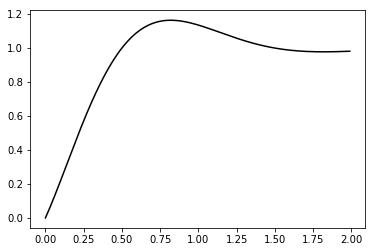

In [3]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()

Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

The value of 'a' that minimizes the L2 norm is [ 4.6035781]
The residual mean squared error is 0.011375058805


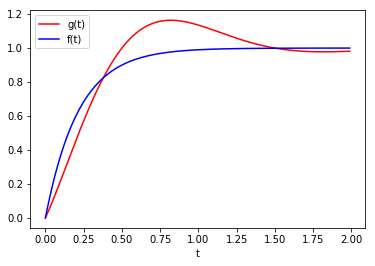

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#define g(t) and f(t)
def f(t, a): #f is defined as a function of a because 
             #curve_fit needs the fit parameter
    return 1-(np.exp(-a*t))
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

#define t from 0 to 2 with a increment of 0.01
t_values = np.arange(0.0, 2.0, 0.01)

#using the curve_fit function to find the 'a' value that minimizes the L2 norm
a, pcov = curve_fit(f, t_values, g(t_values))
print("The value of 'a' that minimizes the L2 norm is", a)

#define arrays f and g to represent the corrresponding values
f = f(t_values, a)
g = g(t_values)

#find the residual mean squared error
RMSE = 0
sum = 0
for n in range(t_values.size):
    sum += (f[n]-g[n])**2
RMSE = sum/n
print("The residual mean squared error is", RMSE)

#plot the function with line color, label, and legend
plt.xlabel('t')
plt.plot(t_values, g, color = 'red', label = "g(t)")
plt.plot(t_values, f, color = 'blue', label = "f(t)")
plt.legend()
plt.show()

1. The value of $a$ that minimzies the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$ is 4.6035781
2. The residual mean squared error is 0.011375058805
3. The **curve_ fit** function is given in the Optimization help page, and it returns the two variables, the first one being the "optimal value for the parameters so that the sum of the squared residuals is minimized, which is exactly what $a$ was asked to be.